In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x=pd.read_csv('logistic_x.txt',sep='\ +',header=None,engine='python')
y=pd.read_csv('logistic_y.txt',sep='\ +',header=None,engine='python')
y=y.astype(int)
x['label']=y[0].values

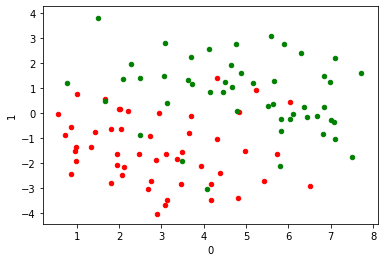

In [3]:
ax=plt.axes()
x.query('label == -1').plot.scatter(x=0,y=1, ax=ax, color='red')
x.query('label == 1').plot.scatter(x=0,y=1, ax=ax, color='green')

In [4]:
xs=x[[0,1]].values
ys=x['label'].values
xs=np.hstack([np.ones([xs.shape[0],1]),xs])

In [5]:
thetas=[]
theta=np.zeros([xs.shape[1]])
loss=1e9
iteration=0
while loss>1e-15:
    zs=ys*xs.dot(theta)
    gz=1/(1+np.exp(-zs))
    hessian=np.zeros([xs.shape[1],xs.shape[1]])
    for i in range(xs.shape[1]):
        for j in range(xs.shape[1]):
            if(i>=j):
                hessian[i][j]=np.mean(gz*(1-gz)*xs[:,i]*xs[:,j])
                if(i!=j):
                    hessian[j][i]=hessian[i][j]
    old_theta=theta.copy()
    gradient=np.mean((gz-1)*ys*xs.T,axis=1)
    theta-=np.linalg.inv(hessian).dot(gradient)
    thetas.append(theta)
    loss=np.sum(np.abs(theta-old_theta))
    iteration+=1
print(iteration)

9


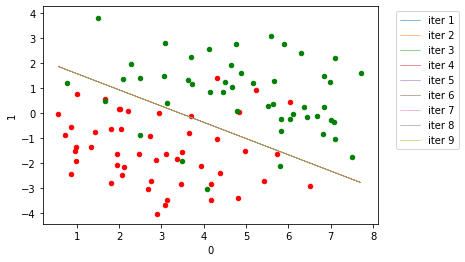

In [6]:
ax=plt.axes()
x.query('label == -1').plot.scatter(x=0,y=1, ax=ax, color='red')
x.query('label == 1').plot.scatter(x=0,y=1, ax=ax, color='green')
_xs = np.array([np.min(xs[:,1]), np.max(xs[:,1])])
for k, theta in enumerate(thetas):
    _ys = (theta[0] + theta[1] * _xs) / (- theta[2])
    plt.plot(_xs, _ys, label='iter {0}'.format(k+1), lw=0.5)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")